# Applying Random Forests to Bike Sharing

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline

In [56]:
bike_rentals = pd.read_csv('bike_rental_hour.csv')
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [57]:
bike_rentals['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

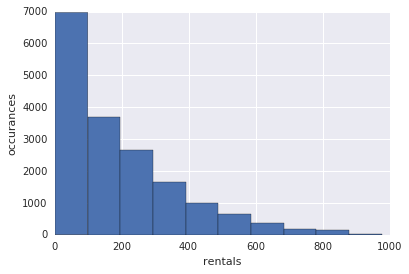

In [58]:
#look at rental distribution
plt.hist(bike_rentals['cnt'])
plt.xlabel('rentals')
plt.ylabel('occurances')
plt.show()

In [59]:
#look at correlation with the cnt...
bike_rentals.corr()['cnt'].sort_values()

hum          -0.322911
weathersit   -0.142426
holiday      -0.030927
weekday       0.026900
workingday    0.030284
windspeed     0.093234
mnth          0.120638
season        0.178056
yr            0.250495
instant       0.278379
hr            0.394071
atemp         0.400929
temp          0.404772
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

It looks like temperature is positively correlated with rentals, as is the time of day.  Whereas humidity is negatively correlated with rental rate.

In [60]:
def assign_label(x):
    """Reduces the time of day from hours to one of 4 areas (morning:1, afternoon:2, evening:3, and night:4)"""
    mapper = {}
    for i in range(0,6):
        mapper[i] = 4
    for i in range(6,12):
        mapper[i] = 1
    for i in range(12,18):
        mapper[i] = 2
    for i in range(18,25):
        mapper[i] = 3
    return mapper[x]

#create a new Feature reducing the hour
bike_rentals['time_label'] = bike_rentals['hr'].apply(lambda x: assign_label(x))
        

Use MSE as the error metric as the data is continuous and squareing the error will help with the high values

In [78]:
#training dataset
train = bike_rentals.sample(frac = 0.8)
test = bike_rentals[~bike_rentals.index.isin(train.index)]

<strong>Linear Regression</strong>

In [89]:
from sklearn.linear_model import LinearRegression

features = ['season', 'yr', 'hr','mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'atemp', 'hum', 'windspeed', 'time_label']
slr = LinearRegression()
slr.fit(train[features],train['cnt'])
pred = slr.predict(test[features])
bikelr_mse = mse(pred,test['cnt'])
print('The Bike MSE is :%0.2f, RMSE is: %0.2f' % (bikelr_mse,np.sqrt(bikelr_mse)))

The Bike MSE is :16954.19, RMSE is: 130.21


<italic>The RMSE of 130.21 is about 68% of the cnt mean.  That doesn't seem terribly poor for the error, but it's not great either.</italic>

<strong>Decision Tree</strong>

In [90]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=10,min_samples_leaf=15)
dt.fit(train[features],train['cnt'])
preddt = dt.predict(test[features])
bikedt_mse = mse(preddt,test['cnt'])
print('The Bike MSE is :%0.2f, RMSE is: %0.2f' % (bikedt_mse,np.sqrt(bikedt_mse)))

The Bike MSE is :3206.57, RMSE is: 56.63


<italic>The RMSE of 56.63 is about 30% of the cnt mean.  Substaintially better.</italic>

<strong>RandomForest Tree</strong>

In [94]:
from sklearn.ensemble import RandomForestRegressor

rt = RandomForestRegressor(n_estimators=150,min_samples_leaf=5)
rt.fit(train[features],train['cnt'])
predrt = rt.predict(test[features])
bikert_mse = mse(predrt,test['cnt'])

print('The Bike MSE is :%0.2f, RMSE is: %0.2f' % (bikert_mse,np.sqrt(bikert_mse)))

The Bike MSE is :1898.33, RMSE is: 43.57


<italic>The RMSE of 43.6 is about 23% of the cnt mean.  Substaintially better.</italic>